# Boilerplate

Import some useful packages. Note that I set mplstyle as `fast` to increase rendering efficiency.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as colormaps
import matplotlib.colors as colors
import matplotlib.style as mplstyle
import numpy as np
import scipy
mplstyle.use('fast')

Notebook settings for animation

In [2]:
animate = True
from cplt3d.generator_funcs import spin_3d_plot

Generate some data for the Gaussian pdf and take some samples

In [3]:
N = 32
X,Y,Z = np.linspace(-4,4,N),np.linspace(-4,4,N),np.linspace(-4,4,N)
X,Y,Z = np.meshgrid(X,Y,Z)
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
pts = np.array([X,Y,Z]).T
GAUSSIAN = scipy.stats.multivariate_normal.pdf(pts,mean = [0,0,0],cov = [[1,0,0],[0,2,0],[0,0,3]])

In [4]:
# take some samples from a unimodal distribution
N = 10000
std = 0.3
np.random.seed(123456)
pts_samples = np.random.multivariate_normal(mean = [0,0,0],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
GAUSSIAN_samples = np.ones(len(pts_samples))

In [5]:
# take some samples from a bimodal distribution
N = 10000
std = 0.3
pos = 1
pts_samples_bi_1 = np.random.multivariate_normal(mean = [pos,pos,pos],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
pts_samples_bi_2 = np.random.multivariate_normal(mean = [-pos,-pos,-pos],cov = [[std,0,0],[0,std,0],[0,0,std]],size = N)
pts_samples_bi = list(pts_samples_bi_1) + list(pts_samples_bi_2)
GAUSSIAN_samples_bi = np.ones(len(pts_samples_bi))

# Uniform Plotting

Import `cplt3d`'s generator functions that we are interested in

In [6]:
from cplt3d.generator_funcs import uniform_histogram,uniform_nearest_interpolator,uniform_linear_interpolator

In [7]:
N_bins = 7

We can easily plot using `matplotlib` objects. For instance, we can plot a nearest interpolation of the Gaussian.

/var/folders/q8/trn9pvn13rz106_g091b9gqc0000gn/T/ipykernel_2547/849279133.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = colormaps.get_cmap('viridis')


finding bins within region
x in ((-4.0, 4.0))
y in ((-4.0, 4.0))
z in ((-4.0, 4.0))
starting coordinate fetch using wrap...
interpolating...
done interpolating 0.010202169418334961 seconds
evaluating...
done evaluating 0.00044274330139160156 seconds
finished coordinate fetch in 0.01096200942993164 seconds
identified (343, (7, 7, 7)) boxes
computing things to use in plotter...
using vmin of 3.8170955524686227e-07
using vmax of 0.02552856610989572
filled is float and filled_invert=False, so removing all boxes with result under 30.0% or result=4.7713222655917035e-05
this eliminates 104 voxels, which is 30.32069970845481% of the total
finished, ready to plot!
plotting...
finished plotting


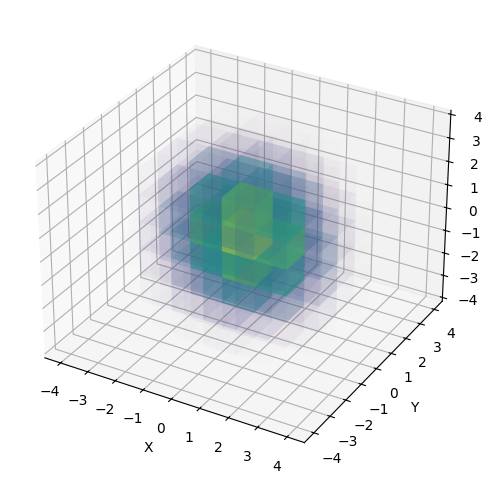

In [8]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')

cmap = colormaps.get_cmap('viridis')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**1.7
use_cmap = colors.ListedColormap(use_cmap)

uniform_nearest_interpolator(ax,pts,GAUSSIAN,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = True)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.savefig('Images/1_Nearest-Uniform Gaussian.png',dpi = 300)

Or a linear interpolation of the Gaussian

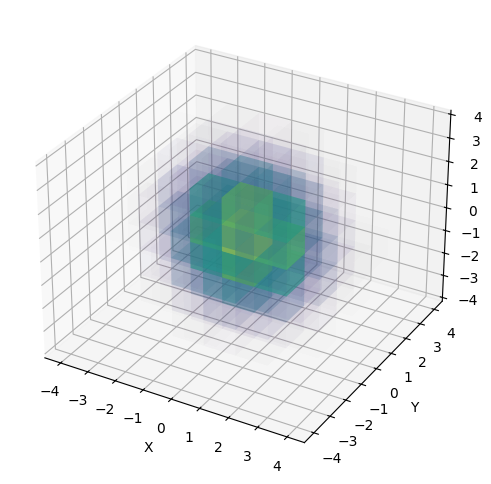

In [9]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')

uniform_linear_interpolator(ax,pts,GAUSSIAN,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = False)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.savefig('Images/2_Linear-Uniform Gaussian.png',dpi = 300)

We can also plot a 3d histogram of the Gaussian. This time we are using the same number of bins as the highest resolution setting for the tree mode to demonstrate the speedup. 

In [10]:
N_bins = 2**5

<timed exec>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


CPU times: user 3.11 s, sys: 1.34 s, total: 4.45 s
Wall time: 1.32 s


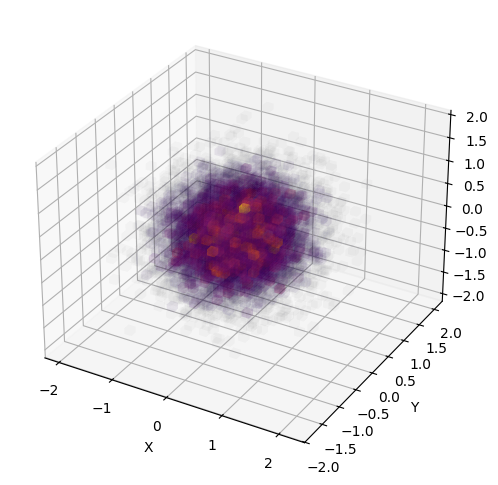

In [11]:
%%time
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')

cmap = colormaps.get_cmap('inferno')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**1.7
use_cmap = colors.ListedColormap(use_cmap)

uniform_histogram(ax,pts_samples,GAUSSIAN_samples,bins = N_bins,filled = 0.3,cmap = use_cmap,verbose = False)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.savefig('Images/3_Histogram-Uniform Gaussian.png',dpi = 300)

# Tree Plotting

Often, it is useful to have a dynamic bin-size, especially in cases where (1) a small binsize is required and (2) most of the points of interest are within a small region. This can be done using the tree_histogram method.

In [12]:
from cplt3d.generator_funcs import tree_histogram

<timed exec>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


CPU times: user 5.9 s, sys: 1.32 s, total: 7.23 s
Wall time: 2.14 s


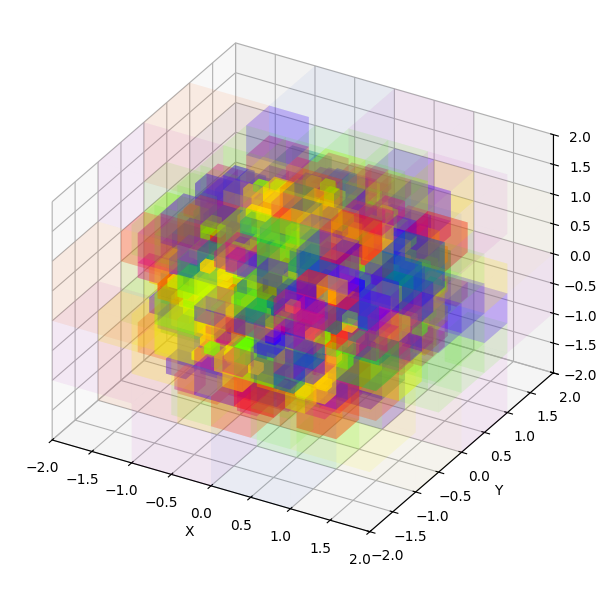

In [13]:
%%time
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')
# we need to patch what happens between levels. i.e we need to generate the lower levels for all of the relevant bins and then pass THAT POPULATION into the bool_map generation scheme.
cmap = colormaps.get_cmap('prism')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**2
use_cmap = colors.ListedColormap(use_cmap)
d = 2
poly = tree_histogram(ax,pts_samples,GAUSSIAN_samples,cmap = use_cmap,
               filled=None,verbose = False,
               _range = [[-d,d],[-d,d],[-d,d]],
               min_resolution = 1,max_resolution = 5,
               vmin = 1,norm = LogNorm)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-d,d)
ax.set_ylim(-d,d)
ax.set_zlim(-d,d)
ax.set_proj_type('ortho')
fig.tight_layout()
fig.savefig('Images/5_Histogram-Tree Gaussian.png',dpi = 500)

/var/folders/q8/trn9pvn13rz106_g091b9gqc0000gn/T/ipykernel_2547/3751996668.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = colormaps.get_cmap('inferno')


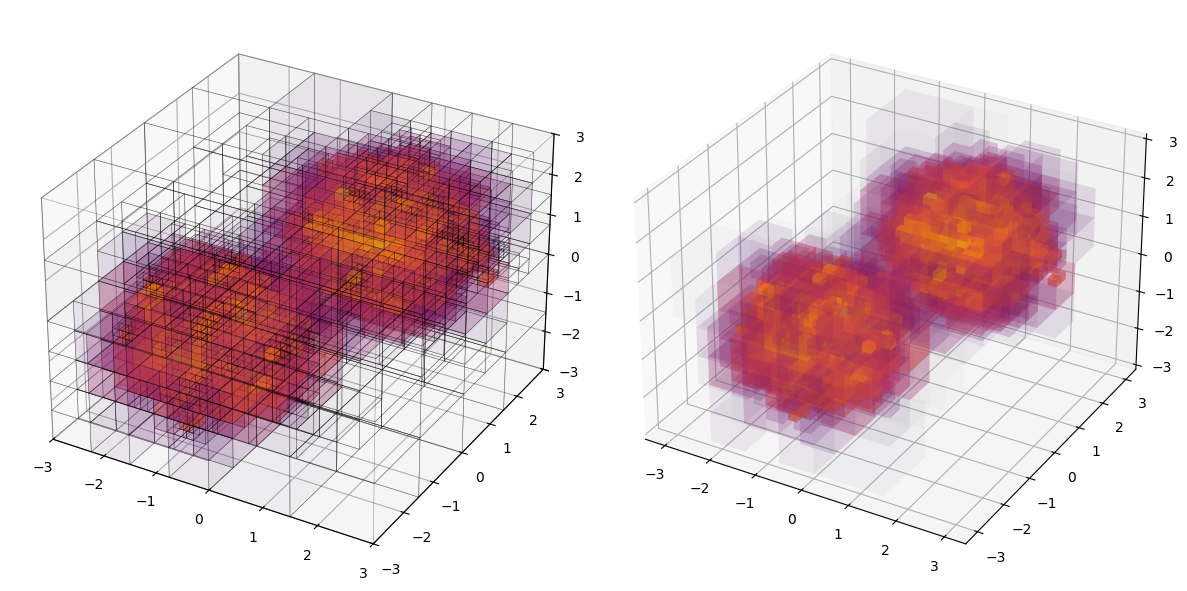

In [14]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (6*2,6))
ax = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')
# we need to patch what happens between levels. i.e we need to generate the lower levels for all of the relevant bins and then pass THAT POPULATION into the bool_map generation scheme.
cmap = colormaps.get_cmap('inferno')
use_cmap = cmap(np.arange(cmap.N))
use_cmap[:,-1] = np.linspace(0,1,cmap.N)**2
use_cmap = colors.ListedColormap(use_cmap)
d = 3

poly = tree_histogram(ax,np.array(pts_samples_bi),np.array(GAUSSIAN_samples_bi),cmap = use_cmap,
               filled=None,verbose = False,
               _range = [[-d,d],[-d,d],[-d,d]],
               min_resolution = 1,max_resolution = 5,
               vmin = 1,norm = LogNorm,edgecolor_function = lambda x:(0,0,0,0.2),linewidths = 0.4)

poly = tree_histogram(ax2,np.array(pts_samples_bi),np.array(GAUSSIAN_samples_bi),cmap = use_cmap,
               filled=None,verbose = False,
               _range = [[-d,d],[-d,d],[-d,d]],
               min_resolution = 1,max_resolution = 5,
               vmin = 1,norm = LogNorm)


ax.set_xlim(-d,d)
ax.set_ylim(-d,d)
ax.set_zlim(-d,d)
fig.tight_layout()
fig.savefig('Images/6_Histogram-Tree Dual-Gaussian.png',dpi = 500)

`cplt3d` also makes it easy to animate rotating 3d plots. The process is parallelized which makes it substantially faster for more complex plots. 

In [15]:
if animate and __name__ == '__main__':
    folder_in = '/Users/benjamincohen/Documents/Research/Inflation/Project/cplt3d/Examples/Gaussian/Images'
    spin_3d_plot(fig,[ax,ax2],'Images/7_Gaussian_Histogram',step=1,merge=True,delete=True,fps = 15,
                parallel = True,verbose = True,Animation_Generation_Folder=folder_in,dpi = 500)

animating...
setup for parallel run
Using 10 cpus
preparing file structure...
/Users/benjamincohen/Documents/Research/Inflation/Project/cplt3d/Examples/Gaussian/Images already exists, adding temp inside...
completed filestructure preparation
saving frames into /Users/benjamincohen/Documents/Research/Inflation/Project/cplt3d/Examples/Gaussian/Images/17251719
True - this folder and its contents will be deleted at the end of the run
the code will save into a(n) gif file
preparing saving function...
saving functions prepared
generating 360 animation frames...
 

Animation 0:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 1:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 2:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 3:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 4:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 5:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 6:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 7:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 8:   0%|          | 0/37 [00:00<?, ?it/s]

Animation 9:   0%|          | 0/28 [00:00<?, ?it/s]

finished generating animation
combining animation...
360 frames found:


/Users/benjamincohen/miniforge3/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/benjamincohen/miniforge3/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/b

Loading Frames:   0%|          | 0/360 [00:00<?, ?it/s]

saving at 15 fps...
removing animation generation folder: /Users/benjamincohen/Documents/Research/Inflation/Project/cplt3d/Examples/Gaussian/Images/17251719
